## Comp377  Group Project
### Group 4  Sec. 003
#### Objective: Predicting penguin species
#### Dataset is about Arctic penguins
#### It includes data on 344 individual penguins with 3 species represented. 

In [2]:
#Required Imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report
import pickle

In [3]:
#import pandas and load data set
import pandas as pd
data1 = pd.read_csv('penguins.csv')

In [4]:
#Display Columns
data1.columns

Index(['species', 'island', 'bill_length_mm', 'bill_depth_mm',
       'flipper_length_mm', 'body_mass_g', 'sex', 'year'],
      dtype='object')

In [5]:
#Rename columns
data1 = data1.rename(columns={'species':'Species','island':'Island','bill_length_mm': 'Bill Length', 'bill_depth_mm': 'Bill Depth','flipper_length_mm': 'Flipper Length','body_mass_g': 'Body Mass','sex':'Sex','year':'Year'})

In [6]:
#Display first five rows
data1.head()

,Species,Island,Bill Length,Bill Depth,Flipper Length,Body Mass,Sex,Year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007


In [7]:
#Display last five rows
data1.tail()

,Species,Island,Bill Length,Bill Depth,Flipper Length,Body Mass,Sex,Year
339,Chinstrap,Dream,55.8,19.8,207.0,4000.0,male,2009
340,Chinstrap,Dream,43.5,18.1,202.0,3400.0,female,2009
341,Chinstrap,Dream,49.6,18.2,193.0,3775.0,male,2009
342,Chinstrap,Dream,50.8,19.0,210.0,4100.0,male,2009
343,Chinstrap,Dream,50.2,18.7,198.0,3775.0,female,2009


In [8]:
#Display shape
data1.shape

(344, 8)

In [9]:
# Check for null values
print(len(data1) - data1.count())

Species            0
Island             0
Bill Length        2
Bill Depth         2
Flipper Length     2
Body Mass          2
Sex               11
Year               0
dtype: int64


In [10]:
#Drop Null Values
data1 = data1.dropna()

In [11]:
# Check for null values
print(len(data1) - data1.count())

Species           0
Island            0
Bill Length       0
Bill Depth        0
Flipper Length    0
Body Mass         0
Sex               0
Year              0
dtype: int64


In [12]:
data1.shape

(333, 8)

In [13]:
#Specify target and features
target = data1['Species']
features = data1[['Island', 'Bill Length', 'Bill Depth',

                       'Flipper Length', 'Body Mass', 'Sex']]

In [14]:
features.head()

,Island,Bill Length,Bill Depth,Flipper Length,Body Mass,Sex
0,Torgersen,39.1,18.7,181.0,3750.0,male
1,Torgersen,39.5,17.4,186.0,3800.0,female
2,Torgersen,40.3,18.0,195.0,3250.0,female
4,Torgersen,36.7,19.3,193.0,3450.0,female
5,Torgersen,39.3,20.6,190.0,3650.0,male


In [15]:
target.head()

0    Adelie
1    Adelie
2    Adelie
4    Adelie
5    Adelie
Name: Species, dtype: object

In [16]:
# count of unique values in the target
data1['Species'].nunique()

3

In [17]:
# display unique values in the target
print(data1['Species'].unique())

['Adelie' 'Gentoo' 'Chinstrap']


<AxesSubplot:>

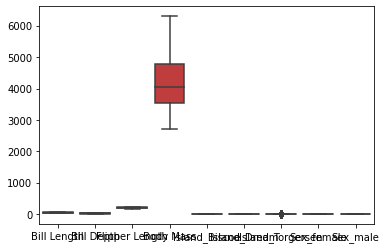

In [19]:
# Boxplot for outliers in x_train dataset
import seaborn as sns
sns.boxplot(data = features)

In [20]:
# Scaling using MinMaxScaler
min_max_scaler = MinMaxScaler().fit(features)
normTrainX = min_max_scaler.transform(features)
print('normTrainX', normTrainX.shape)

normTrainX (333, 9)


<AxesSubplot:>

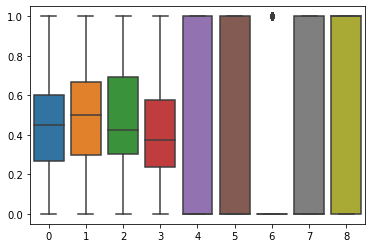

In [21]:
# Boxplot after normalization
sns.boxplot(data = normTrainX)

In [18]:
# Convert categorical values to numerical values for use in correlation
features = pd.get_dummies(features)
target, uniques = pd.factorize(target)

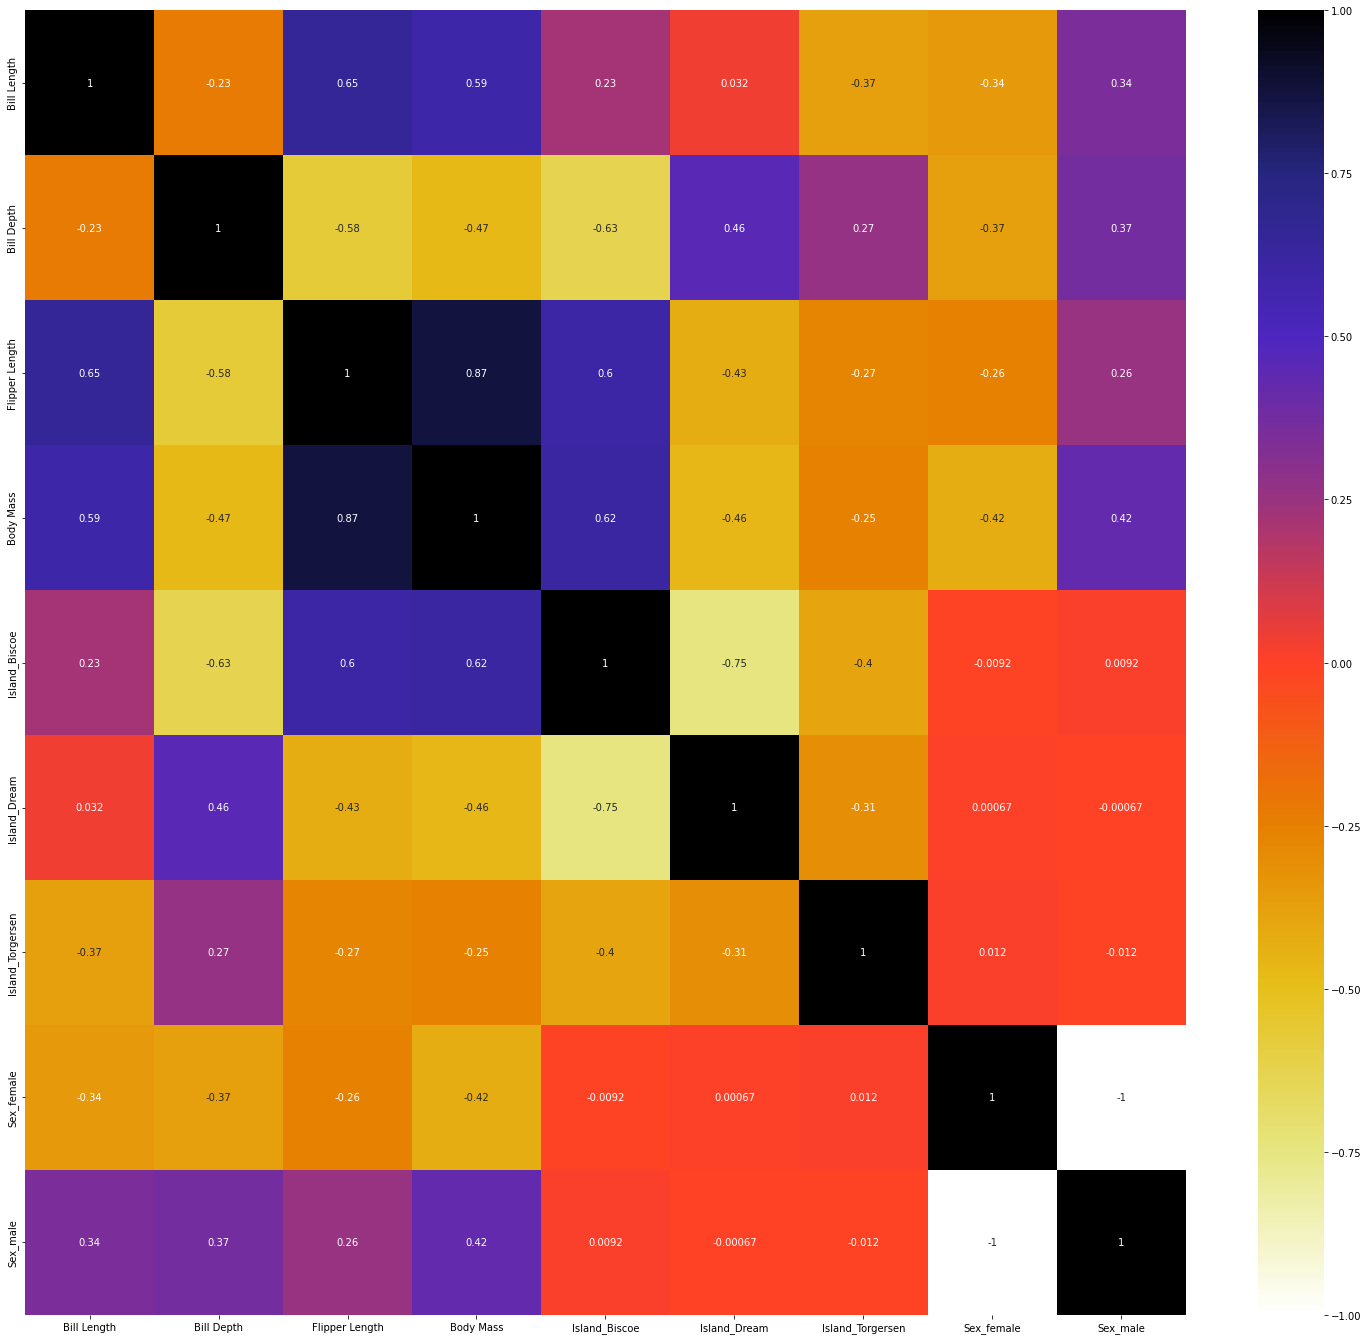

In [22]:
# Heatmap using Pearson Correlation
plt.figure(figsize=(26,24))
cor = features.corr()
#print(cor)
sns.heatmap(cor, annot=True, cmap=plt.cm.CMRmap_r)
plt.show()

In [23]:
# With the following function we can select highly correlated features
def correlation(features, threshold):
    col_corr = set() #set of all the names of correlated columns
    corr_matrix = features.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: #we are interested in absolute coeff value
                colname = corr_matrix.columns[i] #getting the name of column
                col_corr.add(colname)
    return col_corr

# Set the threshold to 0.7
corr_features = correlation(features, 0.5)
len(set(corr_features))

# Get columns with high correlation
print(corr_features)

{'Body Mass', 'Island_Dream', 'Island_Biscoe', 'Flipper Length', 'Sex_male'}


In [24]:
print('Unique Target Classes') 
print(uniques)
print('Target Values') 
print(target)
print('First five rows of Feature') 
print(features.head())

Unique Target Classes
Index(['Adelie', 'Gentoo', 'Chinstrap'], dtype='object')
Target Values
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]
First five rows of Feature
   Bill Length  Bill Depth  Flipper Length  Body Mass  Island_Biscoe  \
0         39.1        18.7           181.0     3750.0              0   
1         39.5        17.4           186.0     3800.0       

In [25]:
# split dataset into training and testing dataset
x_train, x_test, y_train, y_test = train_test_split(

    features, target, test_size=.2)

In [26]:
print('x_train: ', x_train.shape)
print('x_test: ', x_test.shape)
print('y_train: ', y_train.shape)
print('y_test: ', y_test.shape)

x_train:  (266, 9)
x_test:  (67, 9)
y_train:  (266,)
y_test:  (67,)


In [32]:
# using RandomForestClassifier to build the model 

#Random forests is a supervised learning algorithm. 
#It can be used both for classification and regression. 
#It is also the most flexible and easy to use algorithm. 

rfc = RandomForestClassifier(random_state=15)
# fit the model
rfc.fit(x_train, y_train)

RandomForestClassifier(random_state=15)

In [33]:
#Predict using test data
y_pred = rfc.predict(x_test)
print(y_pred)

[0 1 1 1 0 1 1 2 0 2 1 1 1 1 0 1 1 2 1 1 1 2 2 2 0 1 1 2 1 0 0 2 0 2 0 0 2
 0 0 0 1 2 2 0 0 0 0 0 0 0 1 0 1 1 0 0 2 1 0 2 1 0 1 0 1 1 0]


In [34]:
#Print actual test values
print(y_test)

[0 1 1 1 0 1 1 2 0 2 1 1 1 1 0 1 1 0 1 1 1 2 2 2 0 1 1 2 1 0 0 2 0 2 0 0 2
 0 0 0 1 2 2 0 0 0 0 0 0 0 1 0 1 1 0 0 2 1 0 2 1 0 1 0 1 1 0]


In [35]:
#Evaluate the model using accuracy_score
score = accuracy_score(y_pred, y_test)
print('Our accuracy score for this model is {}'.format(score))

Our accuracy score for this model is 0.9850746268656716


In [36]:
# accuracy of the model in percent format upto 2 floating points
accuracy = accuracy_score(y_test, y_pred)
print(f'The accuracy is: {accuracy*100:.2f}%')

The accuracy is: 98.51%


In [37]:
#Display classes
rfc.classes_

array([0, 1, 2])

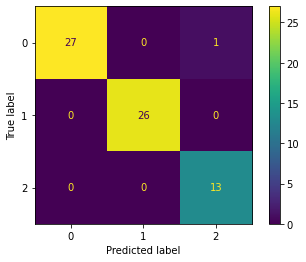

In [38]:
# Build and Display Confusion Matrix
cm = confusion_matrix(y_test, y_pred, labels=rfc.classes_) 
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=rfc.classes_)
disp.plot()
plt.show()

In [39]:
# Print the Classification Report
# y_test has true label / target values for test features, 
# y_pred has predicted label / target values for test features
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.96      0.98        28
           1       1.00      1.00      1.00        26
           2       0.93      1.00      0.96        13

    accuracy                           0.99        67
   macro avg       0.98      0.99      0.98        67
weighted avg       0.99      0.99      0.99        67



In [40]:
# print the number of correctly classified samples
print(accuracy_score(y_test, y_pred, normalize=False))

66


In [41]:
# print the fraction of correctly classified samples
print(accuracy_score(y_test, y_pred)) 

0.9850746268656716


In [42]:
#Store trained model 
rf_pickle = open('random_forest_penguin.pickle', 'wb')

pickle.dump(rfc, rf_pickle)

rf_pickle.close()

output_pickle = open('output_penguin.pickle', 'wb')

pickle.dump(uniques, output_pickle)

output_pickle.close() 